<a href="https://colab.research.google.com/github/rilschultz/CS167Notes/blob/main/Day16_Perceptrons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS167: Day16
## Perceptrons

#### CS167: Machine Learning, Spring 2023

Tuesday, March 28th, 2023

📆 [Course Schedule](https://docs.google.com/spreadsheets/d/e/2PACX-1vSvFV5Mz0_YZE1d5r3gQ8IMktE4cBAsJIlP30cl2GhEpSO0J-YWV62QokSDz-OcOCsEmxMuKpY0kVlR/pubhtml?gid=0&single=true) | 🙋[PollEverywhere](https://pollev.com/meredithmoore011) | 📜 [Syllabus](https://analytics.drake.edu/~moore/cs167_s23_syllabus.html) | 📬 [CodePost Login](https://codepost.io/login)

# Admin Stuff

You should be working on:
- Quiz #2 will be released after class today, due before the end of the day on Tuesday 4/4


## 🙋 PollEverywhere 

# Quick Review:

## Dimensionality Reduction Techniques:
1. __Feature Selection/Elimination__: choose which features are important
2. __Feature Extraction__: transforming raw data into numeric feaures that can be processed while preserving the information in the original dataset

# 1. Feature Selection/Elimination:

__Big Idea__: Choose only the important existing features, and use those for classification or regression. 

## Advantages of Feature Selection/Elimination:

- Simplicity--easily interpretable
- maintaining the interpretability of your variables (in comparison to feature extraction)

## Disadvantages of Feature Selection/Elimination:

- you lose data by dropping columns

## Feature Selection Code (all together)

In [ ]:
#load data first

# create an instance of 'SelectKBest'
selector = SelectKBest(k=2)

# fit it on your train data and solutions
selector.fit(train_data,train_sln)

# transform your traning data to only have the k best attributes
train_transformed = selector.transform(train_data)
test_transformed = selector.transform(test_data)

#build a model
clf = KNeighborsClassifier()
clf.fit(train_transformed,train_sln)
predictions = clf.predict(test_transformed)
print('Accuracy:',accuracy_score(test_sln,predictions))

Accuracy: 0.9333333333333333


# 2. Feature Extraction:

If you are working with high dimensional data, it is often advantageous to do some __feature extraction__ before building and testing your machine learning models. 

__Feature extraction__ takes the existing (usually high dimensional) dataset, and returns a dataset such that there are new columns of data that are ordered from most important to least important. 

__Big Idea__: Find new or _latent_ features made up of combinations of existing features.

Example: 
- Maybe multiplying `sepal length * petal width` is more helpful in identyfing the species of an iris than either `sepal length` or `petal width` are on their own.

## High-Level Overview of PCA:

Calculating PCA requires a relatively deep background in linear algebra--calculating the eigenvectors and their corresponding eigenvalues of covariance matrices. So... we're going to stick to a practical level of understanding.

The __principal component__ is the one that has the largest __variance__. The second component has the second most variance, etc.

https://setosa.io/ev/principal-component-analysis/

## Advantages of Feature Extraction (PCA):

- Minimal data loss
- Output is ordered by how well each component predicts the dependent variable.

## Disadvantages of Feature Extraction (PCA):

- data becomes much less interpretable

## When should I use PCA?

Ask yourself these questions:

1. Do you want to __reduce the number of variables__, but aren't able to identify variables to copmletely remove from consideration?

2. Do you want to ensure your variables are __independent of one another__?
    - __independence__: variables are independent if and only if the occurrence of one does not affect the probability of the occurence of the other.

3. Are you comfortable making your independent variables __less interpretable__?

If the answers to the above questions are yes, then doing a PCA on your data before you build/run your model is probably a good idea.

# PCA Code (all together)

In [1]:
from sklearn.decomposition import PCA

# build your PCA extractor, decide how many output components (columns) you'd like
extractor = PCA(n_components=2, whiten=True)

#When fitting with PCA, you do not use the target column - this is an unsupervised learning algorithm
extractor.fit(train_data)

# transform your train_data and _test_data
train_transformed = extractor.transform(train_data)
test_transformed = extractor.transform(test_data)

#build and test your model
clf = KNeighborsClassifier()
clf.fit(train_transformed,train_sln)
predictions = clf.predict(test_transformed)
print('Accuracy:',accuracy_score(test_sln,predictions))

NameError: ignored

# ✨ New Material

# Deep Learning

__Deep Learning__  uses networks of 'artificial neurons' similar to the brain to represent high-dimensional data
- excels in tasks where the basic unit (a single pixel, frequency of a word) has very little meaning in and of itself, but contains high level structure

We're going to start simple and build up. 

## Biological Motivation

Brains consist of a network of neurons:
- Dense network, $10^{11}$ neurons
- each on average connected to $10^4$ others
- neuron switching times <0.001 seconds - relatively slow
- fast recognition --> highly parallel brain

<div>
<img src="https://github.com/merriekay/S23-CS167-Notes/blob/main/images/day16_neuron.png?raw=1" width=800/>
</div>

<div>
<img src="https://github.com/merriekay/S23-CS167-Notes/blob/main/images/day16_neuron2perceptron.png?raw=1" width=700/>
</div>

# Perceptron

The mathematical model of a _single neuron_ in a neural network is called a __perceptron__.
- Each $x_{i}$ is one of the predictor features--i.e. sepal length, gender, age, etc.
- Each $w_{j}$ is some weight we multiply the feature value by.

__Big Question__: How do we determine the weights that best classify the data?

<div>
<img src="https://github.com/merriekay/S23-CS167-Notes/blob/main/images/day16_perceptron.png?raw=1" width=850/>
</div>

# 💬 Goup Exercise:

Download the `earthquake.xlsx` data from Blackboard. Try to change the weights to get the line to separate the classes. 

<div>
<img src="https://github.com/merriekay/S23-CS167-Notes/blob/main/images/day16_earthquakedata.png?raw=1" width=850/>
</div>

Things to pay attention to:
- small changes of the weights in order to classify the training data accurately
- how do you know when to stop?

# The Forward Step:

The __forward step__ in a neural network is the step of receiving input, and getting an output based on the input. In other words, making a prediction from an input. This step is also known as the _inference step_. 

<div>
<img src="https://github.com/merriekay/S23-CS167-Notes/blob/main/images/day16_forwardstep.png?raw=1" width=850/>
</div>


# The Backward Step:

The __backward step__ in a neural network is the step of checking to see if the model got the prediction correct, and if not, adjusting the weights to make a better prediction next time. We also call this step _updating the weights_.

<div>
<img src="https://github.com/merriekay/S23-CS167-Notes/blob/main/images/day16_backwardstep.png?raw=1" width=850/>
</div>


# How to train your Perceptron:

__Big Question__: How do we deterine the weights that best classify the data?

One idea:
- start with 0 values for all weights
- Feed in a training example
    - If it is properly classified; great, move on
    - Else; update weights according to the training example
    - Repeat.


<div>
<img src="https://github.com/merriekay/S23-CS167-Notes/blob/main/images/day16_dragon.png?raw=1" width=300/>
</div>


# Perceptron Training Rule

Feed a training examlpe into the perceptron, then for each weight $w_i$:

<div>
<img src="https://github.com/merriekay/S23-CS167-Notes/blob/main/images/day16_updaterule.png?raw=1" width=500/>
</div>


__target__ is the thing in the target column for this example - what you're trying to predict.

__output__ is the perceptron output - what the perceptron is currently set to predict for this example.

__$\eta$ (eta)__ : is a small constant (e.g. 0.1) called the __learning rate__ (controls how quickly the model adapts to the training data).

# Perceptron Training Rule

Feed a training examlpe into the perceptron, then for each weight $w_i$:

<div>
<img src="https://github.com/merriekay/S23-CS167-Notes/blob/main/images/day16_updaterule.png?raw=1" width=500/>
</div>

Note what happens when:
- target and output are both 1
- target and output are both -1 
- target is 1, output is -1
- target is -1, output is 1

# Perceptron Training Algorithm

Do the following for each training example:
- feed in a training example
- update weights with weight update rule

<div>
<img src="https://github.com/merriekay/S23-CS167-Notes/blob/main/images/day16_updaterule.png?raw=1" width=500/>
</div>

<div>
<img src="https://github.com/merriekay/S23-CS167-Notes/blob/main/images/day16_perceptron.png?raw=1" width=800/>
</div>

# ✍🏻 Whiteboard/iPad Example:

`CS167PerceptronExample.pdf` from Blackboard

solution is available online as well.

# Perceptron example:

<div>
<img src="https://github.com/merriekay/S23-CS167-Notes/blob/main/images/day16_perceptron_ex1.png?raw=1" width=800/>
</div>

<div>
<img src="https://github.com/merriekay/S23-CS167-Notes/blob/main/images/day16_perceptron_data.png?raw=1" width=800/>
</div>

# 🚨🚨 Terminology Alert 🚨🚨

__Epoch__: the number of passes through the entire training dataset the machine learning algorithm has completed.


# Perceptron

We can prove the perceptron training algorithm will converge to weight values that correctly classify all training examples (in a fintite number of applications):
- if training data is linearly separable and 
- learning rate is sufficiently small

Perceptrons are primarily used as a __binary classifier__.
- cat v dog, spam v ham, 1 v 0, etc.

To use a perceptron for the Iris data, we need to do something... any ideas?

## Recall: Dummy Variables

A __dummy variable__ is one that takes only the value of 0 or 1 to indicate the absence or presence of some categorical effect.
- When it doesn’t make sense for an attribute to have a numeric order, a dummy variable may be a solution that will allow the data to be applied in a machine learning algorithm. 
- In sklearn, all data needs to be numeric.


__Dummy Variables__ are also referred to as __one-hot encoding__

<div>
<img src="https://github.com/merriekay/S23-CS167-Notes/blob/main/images/day16_onehot.png?raw=1" width=800/>
</div>

## Load your data:

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas
path = '/content/drive/MyDrive/datasets/irisData.csv'
iris_data = pandas.read_csv(path)

In [4]:
iris_dummies = pandas.get_dummies(iris_data, columns=['species'])
iris_dummies.head()

,sepal length,sepal width,petal length,petal width,species_Iris-setosa,species_Iris-versicolor,species_Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


# Perceptron Code

- Documentation: [`sklearn.linear_model.Perceptron()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html)

In [5]:
### use a Perceptron to predict if an iris is a Setosa

import pandas
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn import metrics


#ignore warings -- there are lots of warnings regarding default values of Perceptron; which we accept
import warnings
warnings.filterwarnings("ignore")

# get "dummy" variables for species
iris_dummies = pandas.get_dummies(iris_data, columns = ['species'])
predictors = ['sepal length', 'sepal width', 'petal length', 'petal width']
#target = "species_Iris-virginica"
target = "species_Iris-setosa"
#target = "species_Iris-versicolor"

#establish training and testing sets
train_data, test_data, train_sln, test_sln = train_test_split(iris_dummies[predictors], iris_dummies[target], test_size = 0.2, random_state=41)

#load up scikit-learn Perceptron
perc = Perceptron()
perc.fit(train_data,train_sln)
iris_perc_predictions = perc.predict(test_data)

#output accuracy
print("Setosa accuracy:", metrics.accuracy_score(test_sln, iris_perc_predictions))

Setosa accuracy: 1.0


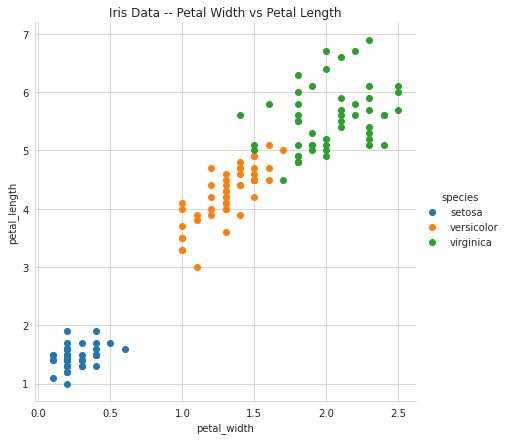

In [6]:
#let's take a look at the data:
import seaborn as sns
import matplotlib.pyplot as plt
 
iris = sns.load_dataset('iris')
sns.set_style("whitegrid")
 
# use seaborn to create a scatterplot
sns.FacetGrid(iris, hue ="species",
              height = 6).map(plt.scatter,
                              'petal_width',
                              'petal_length').add_legend().set(title='Iris Data -- Petal Width vs Petal Length')

## 💬 In class Exercise 1:
- Given the example for species_Iris-versicolor, how does Perceptron do for:
  - species_Iris-virginica
  - species_Iris-setosa
- Do you expect these to also give 100% accuracy? Why or why not?

In [ ]:
# your code here